In [1]:
# Copyright (C) 2018-2022 Pico Technology Ltd. See LICENSE file for terms.
#
# PS5000A BLOCK MODE EXAMPLE
# This example opens a 5000a driver device, sets up two channels and a trigger then collects a block of data.
# This data is then plotted as mV against time in ns.

import ctypes
import numpy as np
from picosdk.ps5000a import ps5000a as ps
import matplotlib.pyplot as plt
from picosdk.functions import adc2mV, assert_pico_ok, mV2adc

import picoscope_module as pm


# Block mdoe

In [7]:
timebase = 628
preTriggerSamples = 10
postTriggerSamples = 250
TriggerLevel=1

maxSamples = preTriggerSamples + postTriggerSamples
ready = ctypes.c_int16(0)
check = ctypes.c_int16(0)
maxADC = ctypes.c_int16()

chandle, status = pm.initialize_picoscope()
chARange, chBRange, status = pm.setup_channels(chandle)
# find maximum ADC count value

pm.setup_trigger(chandle, chARange, chBRange, maxADC,TriggerLevel) #initilize the trigger

# Get timebase information


source = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_B"] #set the buffer
noOfCaptures = 50
status,timeIntervalns = pm.capture_rapid_data_block(chandle, preTriggerSamples, postTriggerSamples, timebase, maxSamples,noOfCaptures)

# Check for data collection to finish using ps5000aIsReady
while ready.value == check.value:
    status["isReady"] = ps.ps5000aIsReady(chandle, ctypes.byref(ready))


buffersMax, buffersMin = pm.create_rapid_buffer(chandle, source, maxSamples, noOfCaptures)
pm.getValuesRapid(chandle,maxSamples,noOfCaptures)

PicoSDKCtypesError: PicoSDK returned 'PICO_NOT_FOUND'

ps5000aSetNoOfCaptures


Number of captures should <= number of memory segments

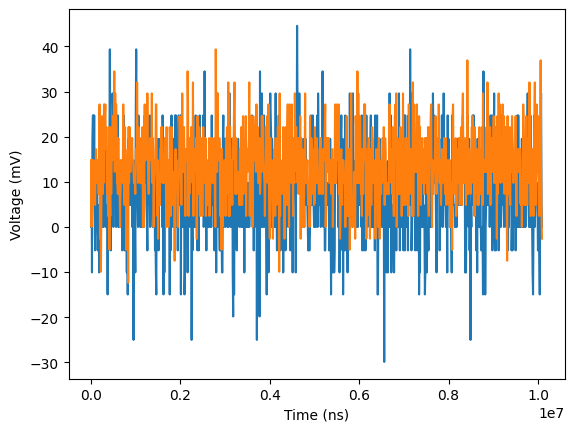

{'getTimebase2': 0, 'runBlock': 0, 'isReady': 0, 'stop': 0, 'close': 0}


In [3]:
# convert ADC counts data to mV
cmaxSamples = ctypes.c_int32(maxSamples)

# Create time data
time = np.linspace(0, (cmaxSamples.value - 1) * timeIntervalns.value, cmaxSamples.value)
with open('test.npy', 'wb') as f:
    np.save(f,time)
    for i in range(noOfCaptures):
        # plot data from channel A and B

        np.save(f,adc2mV(buffersMax[i], chARange, maxADC))
        #This needs to be made better


 

# display status returns
# print(status)

# Stop the scope
status["stop"] = ps.ps5000aStop(chandle)
assert_pico_ok(status["stop"])


# Close unit Disconnect the scope
status["close"]=ps.ps5000aCloseUnit(chandle)
assert_pico_ok(status["close"])

# Rapid block mode

In [6]:
timebase = 628
preTriggerSamples = 10
postTriggerSamples = 250
TriggerLevel=1

maxSamples = preTriggerSamples + postTriggerSamples
ready = ctypes.c_int16(0)
check = ctypes.c_int16(0)
maxADC = ctypes.c_int16()

chandle, status = pm.initialize_picoscope()
chARange, chBRange, status = pm.setup_channels(chandle)
# find maximum ADC count value

pm.setup_trigger(chandle, chARange, chBRange, maxADC,TriggerLevel)

# Get timebase information


source = ps.PS5000A_CHANNEL["PS5000A_CHANNEL_A"]
noOfCaptures = 5
status,timeIntervalns = pm.capture_rapid_data_block(chandle, preTriggerSamples, postTriggerSamples, timebase, maxSamples,noOfCaptures)

# Check for data collection to finish using ps5000aIsReady
while ready.value == check.value:
    status["isReady"] = ps.ps5000aIsReady(chandle, ctypes.byref(ready))


buffersMax, buffersMin = pm.create_rapid_buffer(chandle, source, maxSamples, noOfCaptures)
pm.getValuesRapid(chandle,maxSamples,noOfCaptures)




PicoSDKCtypesError: PicoSDK returned 'PICO_NOT_FOUND'

In [3]:
# convert ADC counts data to mV
cmaxSamples = ctypes.c_int32(maxSamples)

# Create time data
time = np.linspace(0, (cmaxSamples.value - 1) * timeIntervalns.value, cmaxSamples.value)
with open('test.npy', 'wb') as f:
    for i in range(noOfCaptures):
        # plot data from channel A and B

        np.save(f,adc2mV(buffersMax[i], chARange, maxADC))

        # plt.plot(time, )
    # plt.xlabel('Time (ns)')
    # plt.ylabel('Voltage (mV)')
    # plt.show()
 

# display status returns
# print(status)

# Stop the scope
status["stop"] = ps.ps5000aStop(chandle)
assert_pico_ok(status["stop"])


# Close unit Disconnect the scope
status["close"]=ps.ps5000aCloseUnit(chandle)
assert_pico_ok(status["close"])

In [5]:
with open('test.npy', 'rb') as f:
    plt.plot(np.load(f))


EOFError: No data left in file